# <font color='#FFE15D'>**Week 4:  Nonlinear Regression 📈**</font>

## **🔸 Imports**

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, PowerTransformer, FunctionTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

## **🔸 Polynomial Regression (Univariate)**

### Functions

In [ ]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [ ]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [ ]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [ ]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads

In [ ]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [ ]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [ ]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Train

#### - Initialization

In [ ]:
d = 2

w = np.random.randn(d+1, 1)
print(w.shape)

eta = 0.5
n_epochs = 2000

#### - Load Dataset

In [ ]:
df = pd.read_csv('data/auto-train-preprocessed.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_train.shape, y_train.shape

In [ ]:
phi_x_train = polynomial(x_train)
phi_x_train.shape

In [ ]:
df

#### - Main

In [ ]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

### Learning curve

In [ ]:
plt.plot(error_hist)

### Save model

In [ ]:
np.save('polynomial-linear-regression-univariate', w)

### Test

In [ ]:
df = pd.read_csv('data/auto-test-preprocessed.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_test.shape, y_test.shape

In [ ]:
phi_x_test = polynomial(x_test)
phi_x_test.shape

In [ ]:
y_hat_test = linear_regression(phi_x_test, w)
y_hat_test.shape

In [ ]:
mae(y_test, y_hat_test)

In [ ]:
r2(y_test, y_hat_test)

### Visualize

In [ ]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial(x)
y_hat = linear_regression(xp, w)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)

## **🔸 Polynomial Regression (Multivariate)**

### Dataset

- #### Train

In [ ]:
df = pd.read_csv('data/auto-train-multi.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_train.shape, y_train.shape

- #### Test

In [ ]:
df = pd.read_csv('data/auto-test-multi.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_test.shape, y_test.shape

In [ ]:
df.head()

- #### Visualize

In [ ]:
i = 5
plt.scatter(x_train[:, i], y_train)
plt.scatter(x_test[:, i], y_test)

### Polynomial function

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
x_train_poly.shape, x_test_poly.shape

### Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train_poly, y_train)

In [ ]:
model.coef_.shape, model.intercept_

In [ ]:
model.score(x_train_poly, y_train)

In [ ]:
model.score(x_test_poly, y_test)

### Pipeline

In [ ]:
model_pipline = make_pipeline(PolynomialFeatures(), 
                              LinearRegression())
model_pipline

In [ ]:
model_pipline.fit(x_train, y_train)

In [ ]:
model_pipline.score(x_train, y_train)

In [ ]:
model_pipline.score(x_test, y_test)

## **🔸 Closed-form Solution (Exercise)**

- #### Train set

In [ ]:
df = pd.read_csv('data/auto-train-multi.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_train.shape, y_train.shape

- #### Test set

In [ ]:
df = pd.read_csv('data/auto-test-multi.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_test.shape, y_test.shape

In [ ]:
X = x_train.copy()
y = y_train.copy()
X.shape, y.shape

- $
\begin{align}
w &= (X^TX)^{-1} X^T y
\end{align}
$

In [ ]:
phi_X = ...

In [ ]:
wc = np.linalg.inv(... @ ...) @ ... @ y
wc

- #### Test

## **🔸Feature Transform**

- ### Spline Transform
- ### Power Transforms
- ### Basis Functions ($log$, $a^x$, $x^k$)
- ### Quantile Transform

### Dataset

In [41]:
df = pd.read_csv('data/auto-train-preprocessed.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_train.shape, y_train.shape

((352, 1), (352, 1))

In [42]:
df = pd.read_csv('data/auto-test-preprocessed.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_test.shape, y_test.shape

((40, 1), (40, 1))

### Train

In [143]:
alpha = 3

model = make_pipeline(
    # SplineTransformer(n_knots=4, degree=2), 
    # PowerTransformer(),
    # FunctionTransformer(lambda x: np.exp(-alpha*x)),
    # todo: 1/(x+0.5)^2.3
    QuantileTransformer(n_quantiles=20, output_distribution='normal'),
    LinearRegression())

model.fit(x_train, y_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=20,
                                     output_distribution='normal')),
                ('linearregression', LinearRegression())])

### Test

In [144]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.5750317298585719, 0.414173439287596)

In [145]:
y_hat = model.predict(x_train)
mean_absolute_error(y_hat, y_train)

0.098641403853869

In [146]:
y_hat = model.predict(x_test)
mean_absolute_error(y_hat, y_test)

0.12218135660048339

### Visualize

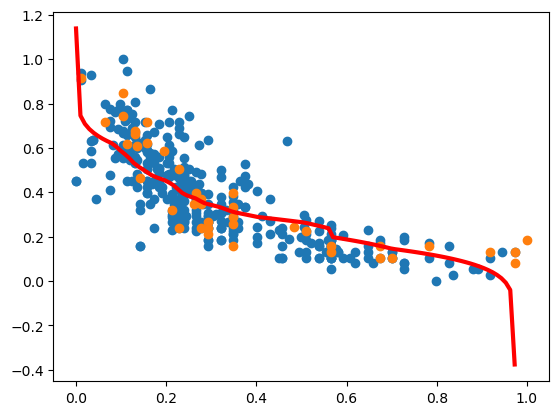

In [147]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
y_hat = model.predict(x)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)

### More about spline

In [69]:
model.named_steps['splinetransformer'].bsplines_[0].t

array([-0.64855073, -0.32427537,  0.        ,  0.32427537,  0.64855073,
        0.9728261 ,  1.29710147,  1.62137683])

In [71]:
spl = SplineTransformer()
spl.fit(x_train, y_train)
spl.knots

'uniform'

### More about power_transform

In [86]:
pt = PowerTransformer()
pt.fit(x_train, y_train)
pt.lambdas_

array([-2.26839811])

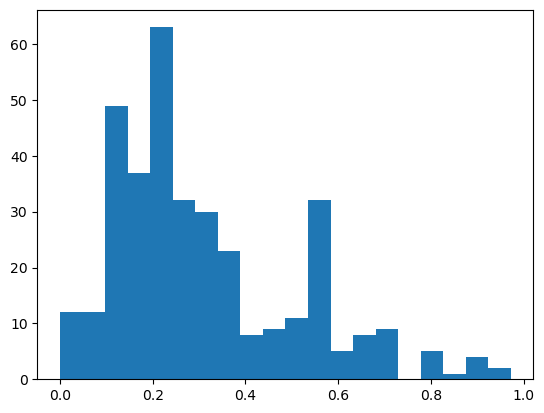

In [92]:
plt.hist(x_train, bins=20);

(array([ 9.,  9., 36., 47., 73., 59., 30., 30., 42., 17.]),
 array([-2.43837389, -1.97982748, -1.52128108, -1.06273467, -0.60418827,
        -0.14564187,  0.31290454,  0.77145094,  1.22999735,  1.68854375,
         2.14709015]),
 <BarContainer object of 10 artists>)

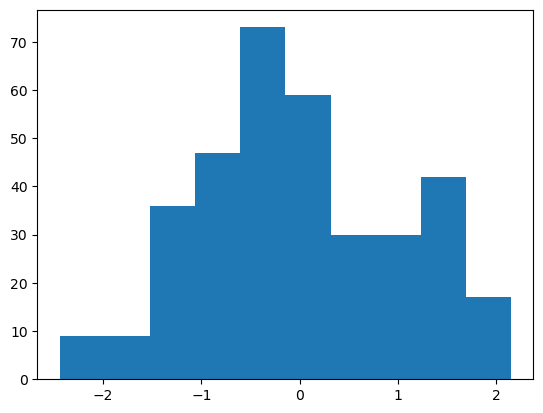

In [93]:
x_transformed = pt.transform(x_train)
plt.hist(x_transformed)

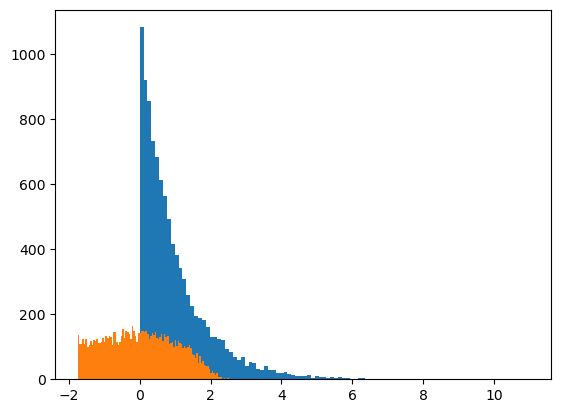

In [97]:
x = np.random.exponential(size=10000).reshape(-1, 1)
plt.hist(x, bins=100);

x_tr = pt.fit_transform(x)
plt.hist(x_tr, bins=100);

### More about quantile

In [132]:
qt = QuantileTransformer(n_quantiles=4, output_distribution='normal')
qt.fit(x_train)
qt.quantiles_

array([[0.        ],
       [0.20652175],
       [0.33695656],
       [0.9728261 ]])